# Contents

1. Corner Detection
  1. Harris Corner Detection
  1. Shi-Tomasi Corner Detection
1. Blob Detection
  1. Simple Blob Detector
  1. DoG
1. Texture Analysis
  1. GLCM
  1. Local Binary Patterns
1. Object Detection
  1. HOG
  1. SIFT
  1. SVM Training
1. Feature Matching
  1. FAST
  1. BRIEF
  1. ORB
1. Image Segmentation
  1. Thresholding
  1. Region Growing


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.feature import graycomatrix, graycoprops, local_binary_pattern

# Corner Detection

## Harris Corner Detection

### Simple Example

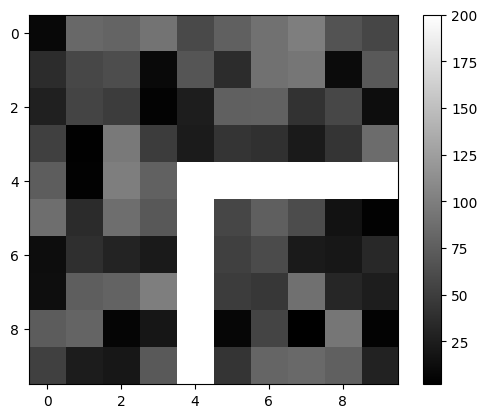

In [9]:
# Create a 10x10 image with random values
rnd_img = np.random.random((10,10)) * 100

# Add two edges to make a corner
rnd_img[4:5,4:] = 200
rnd_img[4:,4:5] = 200


# show the image
plt.imshow(rnd_img, cmap='gray')
plt.colorbar()
plt.show()

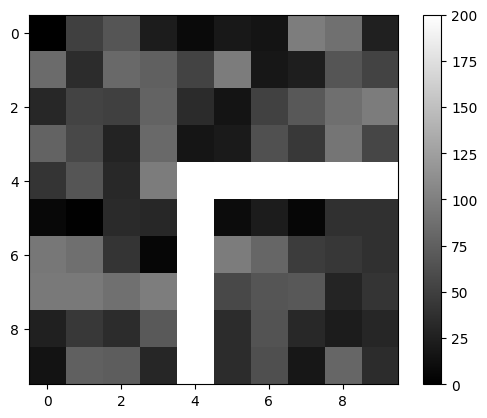

In [10]:
# Load the pre-saved simple image
rnd_img = np.load('/content/simple_image.npy')

# show the image
plt.imshow(rnd_img, cmap='gray')
plt.colorbar()
plt.show()

(10, 10)


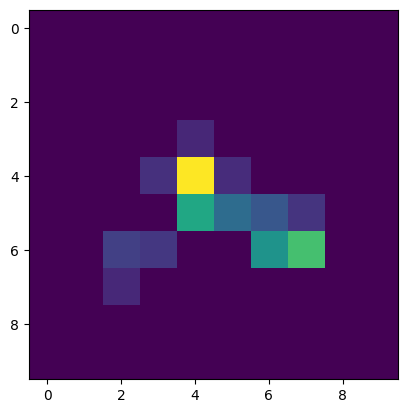

In [17]:
# Convert the values of the image to float
gray_img = np.float32(rnd_img)

# Detect Corners with Harris Corner Detector
corners = cv2.cornerHarris(gray_img, blockSize=2, ksize=5, k = 0.04)
print(corners.shape)
# Apply Threshold
t = corners>corners.max()*0.1
corners_img = corners*t

# Show the Corners detected
plt.imshow(corners_img)
plt.show()

### Real-world Example

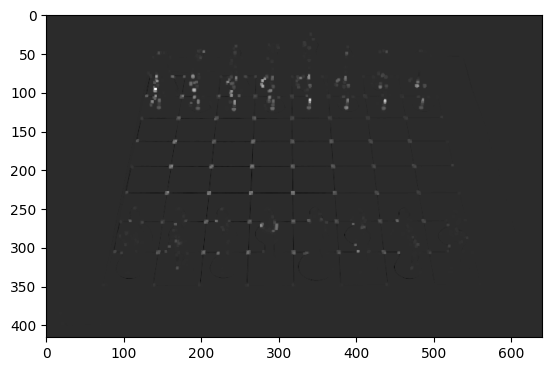

In [31]:
# Load the image
img = cv2.imread('/content/chess-board.jpg')

# Convert the colour space from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get a Grayscale copy of the image
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Detect corners
corners = cv2.cornerHarris(img_gray, blockSize=2, ksize=5, k = 0.06)

# Dilate corner image
corners = cv2.dilate(corners, None)


# Show Corners
plt.imshow(corners, cmap='gray')
plt.show()


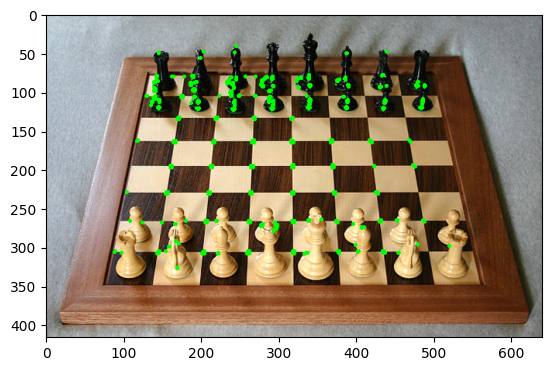

In [33]:
# Apply the corners in the Real Image
thresh = corners.max()*0.1

img_rgb_harris = np.copy(img_rgb)

for j in range(0, corners.shape[0]):
    for i in range(0, corners.shape[1]):
        if(corners[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( img_rgb_harris, (i, j), 1, (0,255,0), 1)

plt.imshow(img_rgb_harris)
plt.show()

## Shi-Tomasi Corner Detector

### Simple Example


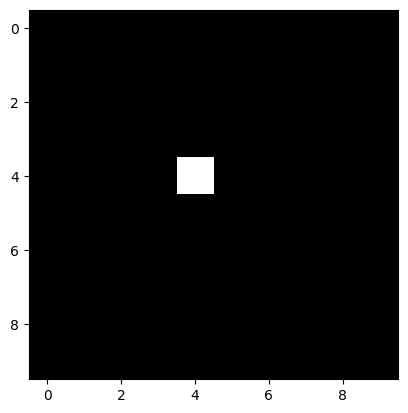

In [37]:
# Load the pre-saved simple image
rnd_img = np.load('/content/simple_image.npy')
rnd_img = np.float32(rnd_img)

# Get corners from cv2.goodFeaturesToTrack
corners = cv2.goodFeaturesToTrack(rnd_img, 0, 0.2, 10)

# Convert the corner values to int
corners = corners.astype(int)

# Show corners
corner_img = np.zeros_like(rnd_img)
for i in corners:
  x,y = i.ravel()
  corner_img[x,y] = 1

plt.imshow(corner_img, cmap='gray')
plt.show()



### Real-world Example

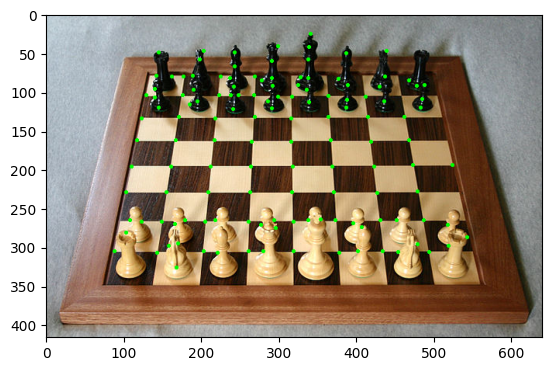

In [40]:
# Load the image
img = cv2.imread('/content/chess-board.jpg')

# Convert the colour space from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get a Grayscale copy of the image
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Detect corners
corners = cv2.goodFeaturesToTrack(img_gray, 0, 0.2, 10)

# Convert the corner values to int
corners = corners.astype(int)

# Show corners
img_rgb_shi_tomasi = np.copy(img_rgb)

for i in corners:
  x,y = i.ravel()
  cv2.circle(img_rgb_shi_tomasi, (x,y), 1, (0,255,0), 2)

plt.imshow(img_rgb_shi_tomasi)
plt.show()

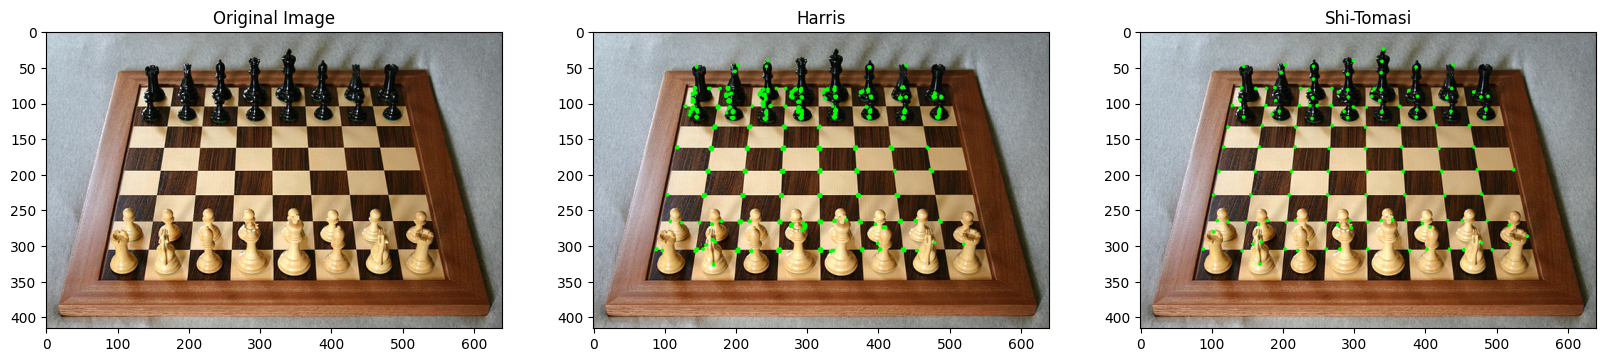

In [43]:
# Compare the Corner detectors

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(img_rgb_harris)
plt.title("Harris")

plt.subplot(1,3,3)
plt.imshow(img_rgb_shi_tomasi)
plt.title("Shi-Tomasi")
plt.show()

# Blob Detection

## Simple Blob Detector

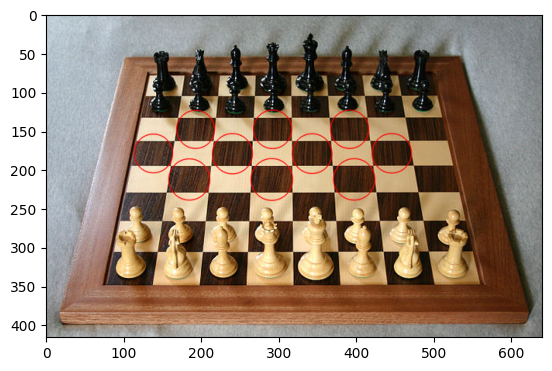

In [44]:
# Load Image
img = cv2.imread('/content/chess-board.jpg')

# Convert the colour space from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create a Simple Blob Detector
detector = cv2.SimpleBlobDetector_create()

# Detect Keypoints
keypoints = detector.detect(img_rgb)

# Draw the detected ketpoints in image
output_image = cv2.drawKeypoints(img_rgb, keypoints, np.zeros((1,1)), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show Image
plt.imshow(output_image)
plt.show()


## Difference of Gaussians

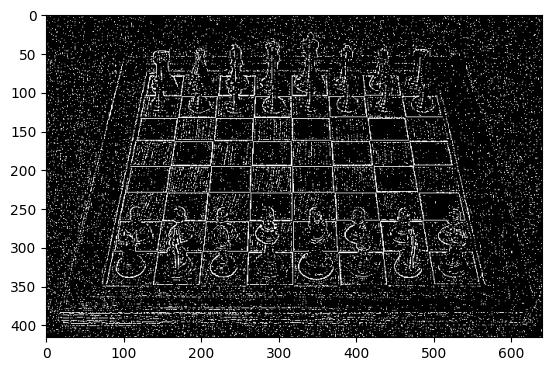

In [46]:
# Load Image
img = cv2.imread('/content/chess-board.jpg', cv2.IMREAD_GRAYSCALE)

# Create two Gaussian Blurred images with two sigmas
img_1 = cv2.GaussianBlur(img, (3,3), 1)
img_2 = cv2.GaussianBlur(img, (3,3), 1.15)

# Get the difference
diff = img_2 - img_1

# Show Image
plt.imshow(diff, cmap='gray')
plt.show()

# Texture Analysis

## Gray-Level Co-occurence Matrix (GLCM)

GLCM output shape:  (256, 256, 1, 1)


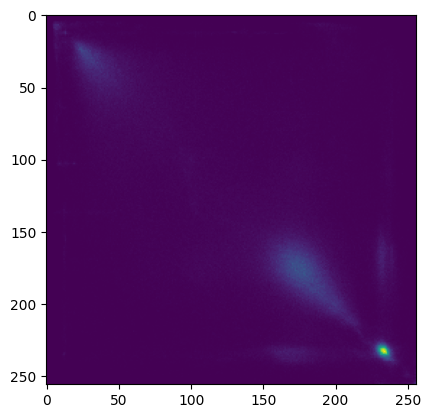

In [57]:
# Load the Image Grayscale
img = cv2.imread('/content/pedestrian.jpeg', cv2.IMREAD_GRAYSCALE)

# Get the GLCM
glcm = graycomatrix(img, distances=[10], angles=[np.pi/2])

print("GLCM output shape: ",glcm.shape)

# Visualise the GLCM
plt.imshow(glcm.squeeze())
plt.show()

GLCM output shape:  (256, 256, 3, 1)
GLCM_ output shape:  (3, 256, 256, 1)


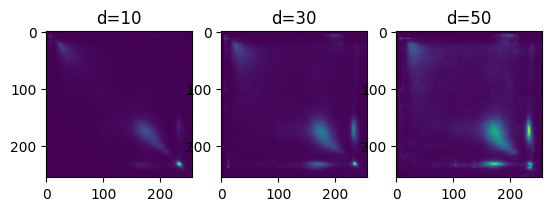

In [55]:
# GLCM with multiple offsets

# Get GLCM
glcm = graycomatrix(img, distances=[10,30,50], angles=[np.pi/2])

print("GLCM output shape: ",glcm.shape)
# Rearrange the axis
glcm_ = np.moveaxis(glcm, 2, 0)
print("GLCM_ output shape: ",glcm_.shape)

# Visualise
plt.figure()
plt.subplot(1,3,1)
plt.imshow(glcm_[0].squeeze())
plt.title("d=10")

plt.subplot(1,3,2)
plt.imshow(glcm_[1].squeeze())
plt.title("d=30")

plt.subplot(1,3,3)
plt.imshow(glcm_[2].squeeze())
plt.title("d=50")

plt.show()


In [59]:
# Get GLCM Properties

# Contrast
contrast = graycoprops(glcm, "contrast" )
print(contrast)

# Dissimilarity
print(graycoprops(glcm, "dissimilarity" ))

# Homogeneity
print(graycoprops(glcm, "homogeneity" ))

# Correlation
print(graycoprops(glcm, "correlation" ))


[[2972.50366971]]
[[35.49646119]]
[[0.06548244]]
[[0.6751355]]


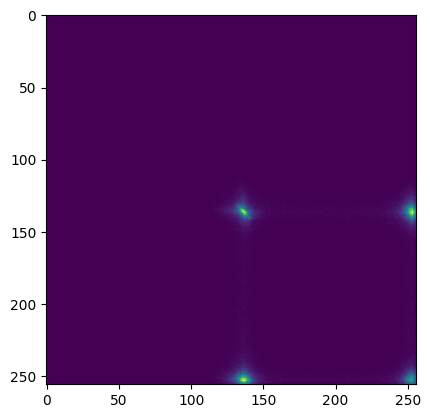

In [63]:
# GLCM in a texture

# Load the dot pattern Image
img = cv2.imread("/content/dot-pattern.jpeg" , cv2.IMREAD_GRAYSCALE)

# Get GLCM
glcm = graycomatrix(img, distances=[10], angles=[np.pi/2])

# Visualise
plt.imshow(glcm.squeeze())
plt.show()


## Local Binary Pattern (LBP)

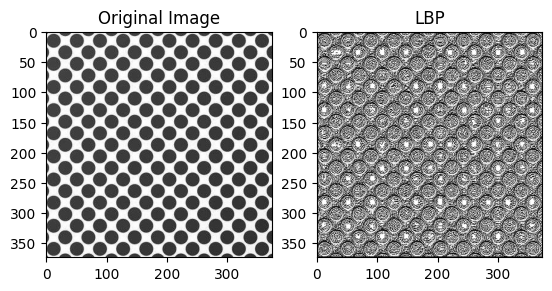

In [66]:
# Load Image in Grayscale
img = cv2.imread('/content/dot-pattern.jpeg', cv2.IMREAD_GRAYSCALE)

# Define parameters for the LBP
radius = 1
n_points = 8 * radius

# Calculate LBP
lbp = local_binary_pattern(img, n_points, radius)

# Visualise
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(lbp, cmap='gray')
plt.title("LBP")
plt.show()


# Object Detection

## Histogram of Orient Gradients (HOG)

### Manual Implementation

(667, 1000)


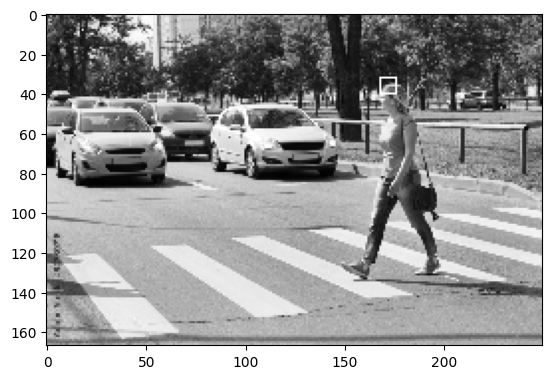

In [75]:
# Load Image in grayscale
img = cv2.imread('/content/pedestrian.jpeg', cv2.IMREAD_GRAYSCALE)
print(img.shape)

# Resize the image
img = cv2.resize(img, (250,167))

# Pick a 8x8 box in the image
(x,y) = (168,32)
img_rec = cv2.rectangle(img, (x,y), (x+8,y+8), color=255)

# Visualise
plt.imshow(img_rec, cmap='gray')
plt.show()

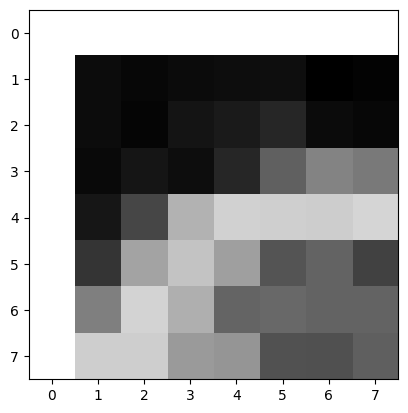

In [76]:
# Extract the 8x8 box
img8x8 = img[y:y+8,x:x+8]

# Visualise 8x8 box
plt.imshow(img8x8, cmap='gray')
plt.show()

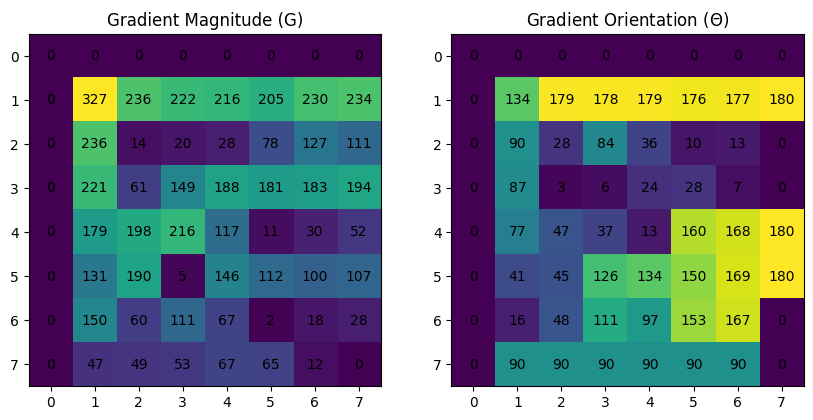

In [83]:
# Get Gx, Gy by Sobel operator
gx = cv2.Sobel(img8x8, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img8x8, cv2.CV_32F, 0, 1, ksize=1)

# Calculate G
G = np.sqrt(gx**2 + gy**2)
G = G.astype(int)

# Calculate theta
theta = np.rad2deg(np.arctan2(gx,gy))
unsigned_theta = theta + theta * (theta<0) * -2
unsigned_theta_int = unsigned_theta.astype(int)

# Visualise G and theta
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(G)
for (j,i),label in np.ndenumerate(G):
    plt.text(i,j,label,ha='center',va='center')
plt.title("Gradient Magnitude (G)")

plt.subplot(1,2,2)
plt.imshow(unsigned_theta_int)
for (j,i),label in np.ndenumerate(unsigned_theta_int):
    plt.text(i,j,label,ha='center',va='center')
plt.title("Gradient Orientation ($\Theta$)")

plt.show()


### OpenCV Implementation


In [87]:
# Load Image in Grayscale
img = cv2.imread('/content/pedestrian.jpeg', cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, (250,167))

# Create HOG Descriptor
hog = cv2.HOGDescriptor()

# Compute HOG
descriptor = hog.compute(img)

print(descriptor.shape)
print(descriptor)


(453600,)
[0.12411053 0.21361147 0.1732575  ... 0.1676215  0.1313104  0.17655125]


## Scale Invarient Feature Transform (SIFT)

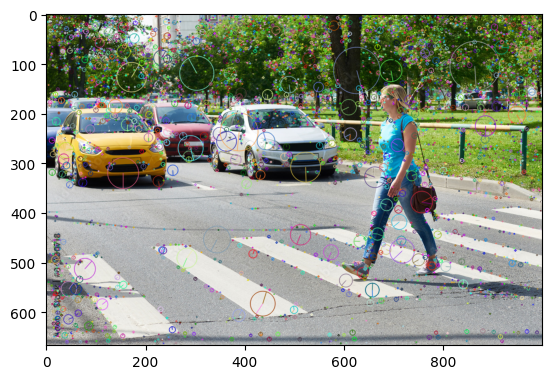

In [93]:
# Load Image
img = cv2.imread('/content/pedestrian.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect Keypoints
keypoints, descriptors = sift.detectAndCompute(img_gray, None)

# Visualise Keypoints
image_with_keypoints = cv2.drawKeypoints(img_rgb, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(image_with_keypoints)
plt.show()

## Train a SVM Classifier

In [94]:
import glob
import os

In [97]:
def load_image(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (128,128))
  return img

def list_files(path):
  return glob.glob(f"{path}/*.jpg")

def load_dataset(root, classes = ['Cat', 'Dog'], max_count_per_class=200):
  labels = []
  images = []

  for cls in classes:
    files = list_files(f'{root}/{cls}')
    files = files[:max_count_per_class]

    for f in files:
      try:
        img = load_image(f)

        labels.append(classes.index(cls))
        images.append(img)
      except Exception as e:
        print(str(e), f)
        continue

  return np.array(labels), np.array(images)

# Load the dataset
labels, images = load_dataset('/content/drive/MyDrive/CSC6203/Data/PetImages_lite')


In [100]:
# Shuffle Data
rand = np.random.RandomState(10)
shuffle = rand.permutation(len(images))
images, labels = images[shuffle], labels[shuffle]

In [103]:
# Create HOG Descriptors
hog = cv2.HOGDescriptor()
hog_descriptions = []

for img in images:
  img_hog = hog.compute(img)
  hog_descriptions.append(img_hog)

hog_descriptions = np.squeeze(hog_descriptions)

print(hog_descriptions.shape)

(400, 34020)


In [107]:
# Split dataset in to train and test sets
train_n=int(0.7*len(hog_descriptions))

images_train, images_test = np.split(images, [train_n])
hog_descriptors_train, hog_descriptors_test = np.split(hog_descriptions, [train_n])
labels_train, labels_test = np.split(labels, [train_n])

In [108]:
# Create SVM Model
C=12.5
gamma=0.50625

model = cv2.ml.SVM_create()

model.setGamma(gamma)
model.setC(C)

model.setKernel(cv2.ml.SVM_RBF)

model.setType(cv2.ml.SVM_C_SVC)

# Train SVM Model

model.train(hog_descriptors_train, cv2.ml.ROW_SAMPLE, labels_train)


True

In [110]:
# Evaluate
def evaluate(model, images, hog_descriptors, labels):
  predictions = model.predict(hog_descriptors)[1].ravel()
  accuracy = (labels == predictions).mean()
  print('Percentage Accuracy: %.2f %%' % (accuracy*100))
  confusion = np.zeros((2, 2), np.int32)
  for i, j in zip(labels, predictions):
      confusion[int(i), int(j)] += 1
  print('confusion matrix:')
  print(confusion)
  vis = []
  for img, flag in zip(images, predictions == labels):
      img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
      if not flag:
          img[...,1:] = 0

      vis.append(img)
  return vis

vis = evaluate(model, images_test, hog_descriptors_test, labels_test)

Percentage Accuracy: 50.00 %
confusion matrix:
[[ 0 60]
 [ 0 60]]


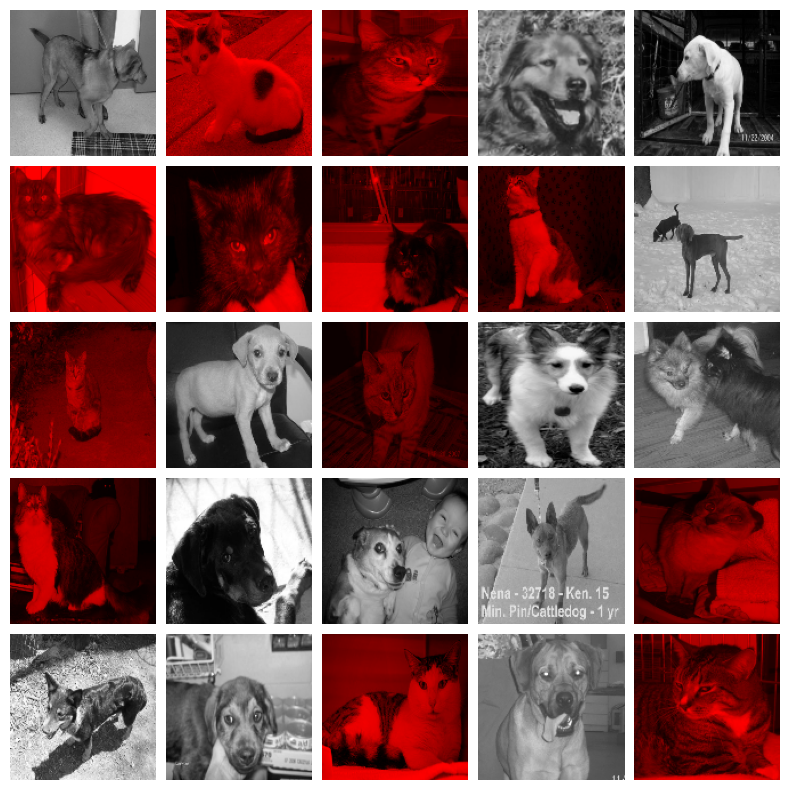

In [111]:
# Visualise
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 5), axes_pad=0.1)

for ax, im in zip(grid, vis[:25]):
    ax.imshow(im)
    ax.axis("off")

plt.show()

# Feature Matching

## FAST Keypoint Detector

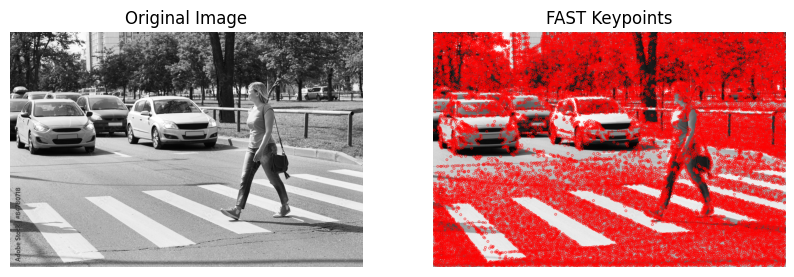

In [112]:
# Load Image
img = cv2.imread('/content/pedestrian.jpeg', cv2.IMREAD_GRAYSCALE)

# Create FAST Detector
fast = cv2.FastFeatureDetector_create()

# Detect Keypoints
keypoints = fast.detect(img)

# Visualise
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(255, 0, 0))

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_with_keypoints, cmap='gray')
plt.title('FAST Keypoints')
plt.axis('off')

plt.show()

## BRIEF Descriptor

In [113]:
# Load Image
img = cv2.imread('/content/pedestrian.jpeg', cv2.IMREAD_GRAYSCALE)

# Create FAST Detector
fast = cv2.FastFeatureDetector_create()

# Detect Keypoints
keypoints = fast.detect(img)

# Initialise BRIEF Extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Get BRIEF Descriptors
keypoints, descriptors = brief.compute(img, keypoints)

# Visualise
print(f"Number of keypoints: {len(keypoints)}")
print(f"Shape of the descriptor array: {descriptors.shape}")
print(descriptors[0])


Number of keypoints: 23056
Shape of the descriptor array: (23056, 32)
[ 94  95 184 201 168 137 181 223 100  20  72  45  73  47 182 223 167  48
 235 226 251 250 123 166 224 180  85 193 191  87  29 170]


## ORB


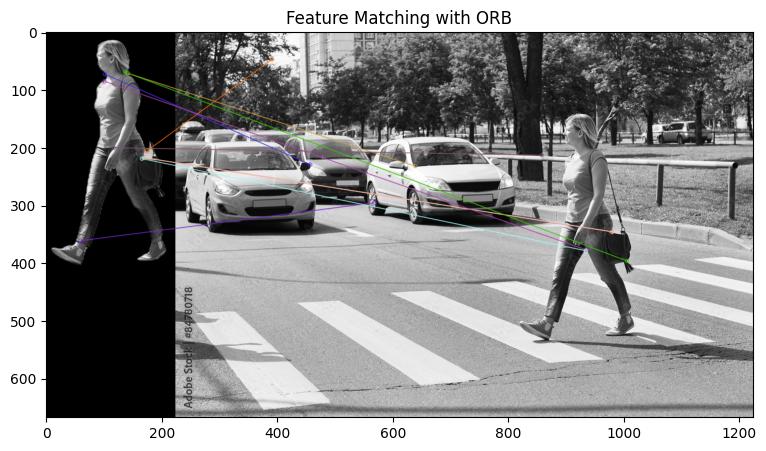

In [117]:
# Load two Images Train and Query Image
img_q = cv2.imread('/content/pedestrian_q.jpg', cv2.IMREAD_GRAYSCALE)  # Query image
img_t = cv2.imread('/content/pedestrian.jpeg', cv2.IMREAD_GRAYSCALE)  # Train image

# Create ORB
orb = cv2.ORB_create()

# Find Keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img_q, mask=None)
kp2, des2 = orb.detectAndCompute(img_t, mask=None)

# Create Bruteforce Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors sort by distance
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Visualise
img_matches = cv2.drawMatches(img_q, kp1, img_t, kp2, matches[:10], img_t, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10,5))
plt.imshow(img_matches)
plt.title('Feature Matching with ORB')
plt.show()


# Image Segmentation

## Threshold Based

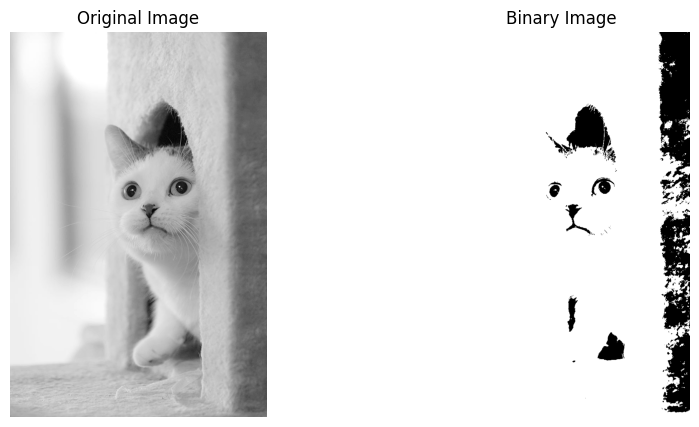

In [122]:
# Load Image
img = cv2.imread('/content/cat-sample.jpeg', cv2.IMREAD_GRAYSCALE)

# Get Binary Image from Threshold segmentation
ret, binary_image = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# Visualise
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img,cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.show()

## Region-Based

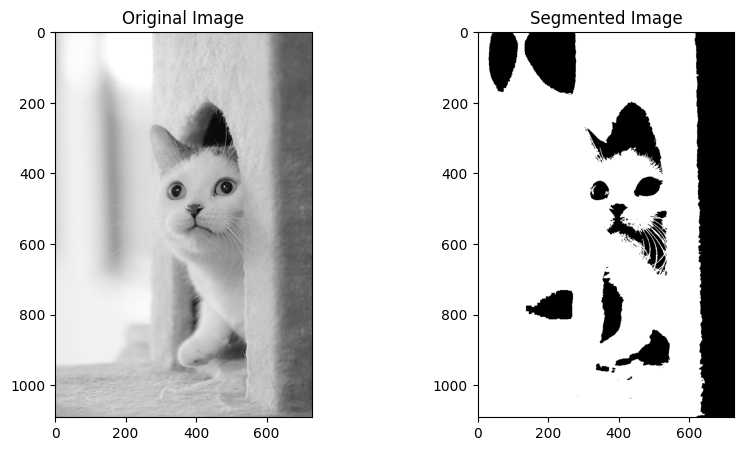

In [126]:
# Define Region Growing function
def region_growing(image, seed, threshold):
    # Initialise the segmented region and a list of points to be checked
    segmented = np.zeros_like(image)
    to_check = [seed]

    # The intensity value of the seed point
    seed_value = image[seed[1], seed[0]]

    while to_check:
        x, y = to_check.pop(0)
        if segmented[y, x] == 0:  # If this pixel is not already segmented
            segmented[y, x] = 255  # Mark this pixel as segmented

            # Check the 4 neighbouring pixels
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy

                # Ensure the neighbour is within image bounds
                if 0 <= nx < image.shape[1] and 0 <= ny < image.shape[0]:
                    # If the neighbour is within the threshold
                    if abs(int(image[ny, nx]) - int(seed_value)) < threshold:
                        to_check.append((nx, ny))

    return segmented

# Load Image
img = cv2.imread('/content/cat-sample.jpeg', cv2.IMREAD_GRAYSCALE)

# Define seed point and threshold
threshold = 50
seed_point = (200,400)

# Get segmented image
segmented_image = region_growing(img, seed_point, threshold)

# Visualise
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
# plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')
# plt.axis('off')

plt.show()
